<a href="https://colab.research.google.com/github/codewithAshwani/MNIST-Speech-classification/blob/main/CNN_Speech_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from pickle import dump
from pickle import load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
PICKLE_PATH = "feature.pkl"

In [2]:
def load_data(data_path):
     #Loads training dataset from data file.
     #   :return X (ndarray)
     #   :return y (ndarray)


    data = load(open(data_path, 'rb'))


    # convert lists to numpy arrays
    X = np.array(data["feauture_mfcc"])
    y = np.array(data["labels"])
#    y.astype(int)

    print("Data succesfully loaded!")

    return  X, y

In [3]:
# load data
X, y = load_data(PICKLE_PATH)

 # create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
# add an axis to input sets
X_train = X_train.reshape(-1,X.shape[1],X.shape[2],1)
X_validation = X_validation.reshape(-1,X.shape[1],X.shape[2],1)
X_test = X_test.reshape(-1,X.shape[1],X.shape[2],1)
print(X_train.shape,y_train.shape)

Data succesfully loaded!
(1920, 55, 13, 1) (1920,)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(55, 13, 1)),
    tf.keras.layers.MaxPooling2D(1,1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compile model
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 53, 11, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 9, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 4, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 2, 64)         18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 1, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 704)               0

In [5]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=10, verbose=2)

Epoch 1/10
60/60 - 16s - loss: 1.3647 - accuracy: 0.6161 - val_loss: 0.6503 - val_accuracy: 0.8458
Epoch 2/10
60/60 - 0s - loss: 0.4298 - accuracy: 0.9219 - val_loss: 0.3668 - val_accuracy: 0.9479
Epoch 3/10
60/60 - 0s - loss: 0.2711 - accuracy: 0.9667 - val_loss: 0.3566 - val_accuracy: 0.9521
Epoch 4/10
60/60 - 0s - loss: 0.2225 - accuracy: 0.9776 - val_loss: 0.5072 - val_accuracy: 0.9083
Epoch 5/10
60/60 - 0s - loss: 0.1963 - accuracy: 0.9896 - val_loss: 0.2743 - val_accuracy: 0.9667
Epoch 6/10
60/60 - 0s - loss: 0.1654 - accuracy: 0.9911 - val_loss: 0.2698 - val_accuracy: 0.9729
Epoch 7/10
60/60 - 0s - loss: 0.2134 - accuracy: 0.9755 - val_loss: 0.3207 - val_accuracy: 0.9583
Epoch 8/10
60/60 - 0s - loss: 0.1512 - accuracy: 0.9948 - val_loss: 0.2566 - val_accuracy: 0.9729
Epoch 9/10
60/60 - 0s - loss: 0.1654 - accuracy: 0.9880 - val_loss: 0.2484 - val_accuracy: 0.9688
Epoch 10/10
60/60 - 0s - loss: 0.1309 - accuracy: 0.9958 - val_loss: 0.2484 - val_accuracy: 0.9688


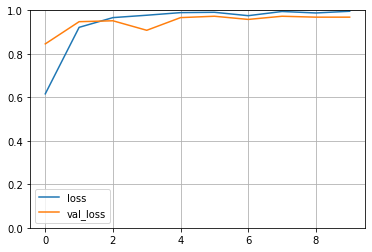

In [6]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='loss')
    plt.plot(history.history['val_accuracy'], label='val_loss')
    plt.ylim([0.0, 1])
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [7]:
score, acc = model.evaluate(X_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

19/19 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 0.9783
Test score: 0.1914069801568985
Test accuracy: 0.9783333539962769


In [8]:
y_predic = np.argmax(model.predict(X_test), axis=1)

In [9]:
print(y_predic[:35])
print(y_test[:35])

[2 0 7 2 9 1 3 4 3 6 2 9 6 6 5 1 8 4 2 0 6 6 2 2 4 7 3 4 5 5 4 8 7 8 5]
[2 0 7 2 9 1 3 4 3 6 2 9 6 6 5 1 8 4 2 0 6 6 2 2 4 7 3 4 5 5 4 8 9 8 5]


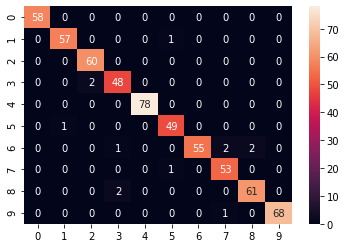

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_predic)
sns.heatmap(cf_matrix, annot=True)